In [1]:
import sentencepiece as spm

import itertools
import nltk
#from keras.preprocessing.sequence import pad_sequences
from utilities import *
import re
import random
import matplotlib as plt
import matplotlib.pyplot as plt

In [70]:
# File paths
txt_file_path = "../../final_all_GS_tagged_words_symbols_sentences.txt"
txt_file_path0 = "../../final_all_GS_tagged_words_symbols_sentences_0.txt"
txt_file_path00 = "../../final_all_GS_tagged_words_symbols_sentences_00.txt"

txt_file_path1 = "../../korr_final_symbols_sentences.txt"
txt_file_path2 = "../../ukrlib_final_symbols_sentences.txt" 
txt_file_path10 = "../../korr_final_symbols_sentences_01.txt"
txt_file_path20 = "../../ukrlib_final_symbols_sentences_01.txt"

txt_file_path300 = "../../korr_ukrlib_final_symbols_sentences_00.txt"

data_path_bpe = "data/korr_ukrlib_data_bpe_20000.pkl"
test_path_bpe = "data/brown_test_data_bpe_20000.pkl"

codes_file_path_25000="../../codes_bpe_korr_ukrlib_20000"
vocab_file_path_25000="../../vocab_bpe_korr_ukrlib_20000"

txt_file_path_25000_applybpe="../../korr_ukrlib_final_symbols_sentences_applybpe_20000.txt"
txt_file_path00_25000_applybpe="../../final_all_GS_tagged_words_symbols_sentences_00_applybpe_20000.txt"

# Sentence tokens
unknown_token = "_#unknown_"
sentence_start_token = "_#start_"
sentence_end_token = "_#end_"
padding_token = "_#padding_"

#Number of words to hold in vocabulary
vocabulary_size = 20000

In [3]:
with open(txt_file_path2, "rt") as infile:
    with open(txt_file_path20, "w+") as outfile:
        for sent in infile:
            if len(sent.split())>58:
                sep=';'
                separ='////'
                for k in sent.replace(sep, sep+separ).split(separ):
                    print(re.sub( r'^   |\n|^\t','',k), file=outfile)
            else:
                outfile.write(sent)
                
with open(txt_file_path1, "rt") as infile:
    with open(txt_file_path10, "w+") as outfile:
        for sent in infile:
            if len(sent.split())>58:
                sep=';'
                separ='////'
                for k in sent.replace(sep, sep+separ).split(separ):
                    print(re.sub( r'^   |\n|^\t','',k), file=outfile)
            else:
                outfile.write(sent)

In [8]:
with open(txt_file_path, "rt") as infile:
    with open(txt_file_path0, "w+") as outfile:
        for sent in infile:
            if len(sent.split())>58:
                sep=';'
                separ='////'
                for k in sent.replace(sep, sep+separ).split(separ):
                    print(re.sub( r'^   |\n|^\t','',k), file=outfile)
            else:
                outfile.write(sent)

#### Delete sentences longer then 60 tokens

In [4]:
with open(txt_file_path20, "rt") as infile:
    with open(txt_file_path300, "w+") as outfile:
        for sent in infile:
            if (len(sent.split()) < 59 and len(sent.split()) > 1):
                outfile.write(sent)

In [5]:
!rm {txt_file_path20}

In [6]:
with open(txt_file_path10, "rt") as infile:
    with open(txt_file_path300, "a+") as outfile:
        for sent in infile:
            if (len(sent.split()) < 59 and len(sent.split()) > 1):
                outfile.write(sent)

In [7]:
!rm {txt_file_path10}

In [9]:
with open(txt_file_path0, "rt") as infile:
    with open(txt_file_path00, "w+") as outfile:
        for sent in infile:
            if (len(sent.split()) < 59 and len(sent.split()) > 1):
                outfile.write(sent)

In [10]:
!rm {txt_file_path0}

#### Train and apply and finetune fastBPE

In [16]:
spm.SentencePieceTrainer.train('--input='+txt_file_path300+' --model_prefix=korr_ukrlib_bpe_model_20000 \
--user_defined_symbols=_#foreign_,_#year_,_#date_,_#time_,_#media_,_#number_,_#float_ \
--vocab_size=20000 --model_type=bpe --bos_piece=_#start_ --eos_piece=_#end_')

True

In [17]:
sp_bpe = spm.SentencePieceProcessor()
sp_bpe.load('korr_ukrlib_bpe_model_20000.model')

True

In [21]:
print(sp_bpe.piece_to_id('_#start_'))

1


In [22]:
print(sp_bpe.piece_to_id('_#end_'))

2


In [23]:
print(sp_bpe.encode_as_ids('_#start__#foreign_,_#year_,_#date_,_#time_,_#media_,_#number_,_#float_ Пункція  _#foreign_,_#year_,_#date_,_#time_,_#media_,_#number_,_#float_ плевральної   порожнини  Показання : ексудативний   і   гнійний   плеврит ,   пневмоторакс ,   гемоторакс ,   хілоторакс ,   гідроторакс .  _#end_'))

[19925, 0, 3, 19944, 4, 19944, 5, 19944, 6, 19944, 7, 19944, 8, 19944, 9, 1135, 609, 362, 19925, 3, 19944, 4, 19944, 5, 19944, 6, 19944, 7, 19944, 8, 19944, 9, 1912, 19931, 19, 1688, 5320, 9105, 283, 3125, 102, 182, 247, 2151, 70, 4275, 42, 107, 291, 128, 1912, 6127, 19934, 11, 10, 8111, 99, 2889, 384, 11, 821, 99, 2889, 384, 11, 2172, 55, 2889, 384, 11, 16421, 2889, 384, 13, 19925, 0]


In [26]:
i=0
with open(txt_file_path00, 'r') as f:
    for line in f:
        if i<100:
            print(line)
            print(len(line.split()))
            print(sp_bpe.encode_as_pieces(line))
            print([len(line.split())]+[sp_bpe.bos_id()]+sp_bpe.encode_as_ids(line)+[sp_bpe.eos_id()])
            print(len([sp_bpe.bos_id()]+sp_bpe.encode_as_ids(line)+[sp_bpe.eos_id()]))
            i+=1

Пункція   плевральної   порожнини  Показання : ексудативний   і   гнійний   плеврит ,   пневмоторакс ,   гемоторакс ,   хілоторакс ,   гідроторакс .  

18
['▁Пу', 'нк', 'ція', '▁пле', 'в', 'ра', 'льної', '▁порож', 'нини', '▁По', 'каза', 'ння', '▁:', '▁е', 'ксу', 'да', 'тивний', '▁і', '▁г', 'ній', 'ний', '▁пле', 'ври', 'т', '▁,', '▁п', 'нев', 'мо', 'тора', 'кс', '▁,', '▁ге', 'мо', 'тора', 'кс', '▁,', '▁хі', 'ло', 'тора', 'кс', '▁,', '▁гідро', 'тора', 'кс', '▁.']
[18, 1, 1135, 609, 362, 1912, 19931, 19, 1688, 5320, 9105, 283, 3125, 102, 182, 247, 2151, 70, 4275, 42, 107, 291, 128, 1912, 6127, 19934, 11, 10, 8111, 99, 2889, 384, 11, 821, 99, 2889, 384, 11, 2172, 55, 2889, 384, 11, 16421, 2889, 384, 13, 2]
47
Техніка   пункції :   для   видалення   повітря   з   плевральної   порожнини   пункцію   виконують   у   другому   міжребер'ї   по   середньоключичній   лінії   ( в   положенні   хворого   сидячи )   або   в   четвертому   -   п'ятому   міжребер'ї   по   середній   пахвовій   лінії  

In [27]:
#!../../bpe/fastBPE/./fast getvocab {txt_file_path0} > {vocab_file_bpe}

In [30]:
with open(txt_file_path300, "rt") as infile:
    tokenized_sentences = [[sp_bpe.bos_id()]+sp_bpe.encode_as_ids(sentence)+[sp_bpe.eos_id()] for sentence in infile]

In [38]:
tokenized_sentences=[sen for sen in tokenized_sentences if len(sen)<=130]

In [53]:
with open(txt_file_path00, "rt") as infile:
    tokenized_sentences_test = [[sp_bpe.bos_id()]+sp_bpe.encode_as_ids(sentence)+[sp_bpe.eos_id()] for sentence in infile]

In [55]:
tokenized_sentences_test=[sen for sen in tokenized_sentences_test if len(sen)<=130]

In [41]:
numwordsSE=0
numwords=0
for sent in tokenized_sentences:
    numwords+=len(sent)-2
    numwordsSE+=len(sent)    

#### Corpus

In [42]:
print ("Number of sentences ", len(tokenized_sentences))
print("Number of all tokens (with _#start_ _#end_ in each sentence) ", numwordsSE) 
print("Number of all tokens (without _#start_ _#end_ in each sentence) ", numwords) 

Number of sentences  14335456
Number of all tokens (with _#start_ _#end_ in each sentence)  346834764
Number of all tokens (without _#start_ _#end_ in each sentence)  318163852


In [43]:
lengths=[]
for sentence in tokenized_sentences:
    lengths.append(len(sentence))

(array([1.671201e+06, 4.755364e+06, 3.726924e+06, 2.220567e+06,
        1.102297e+06, 4.954910e+05, 3.188820e+05, 4.245800e+04,
        2.196000e+03, 7.600000e+01]),
 array([  0,  10,  20,  30,  40,  50,  60,  80, 100, 120, 140]),
 <a list of 10 Patch objects>)

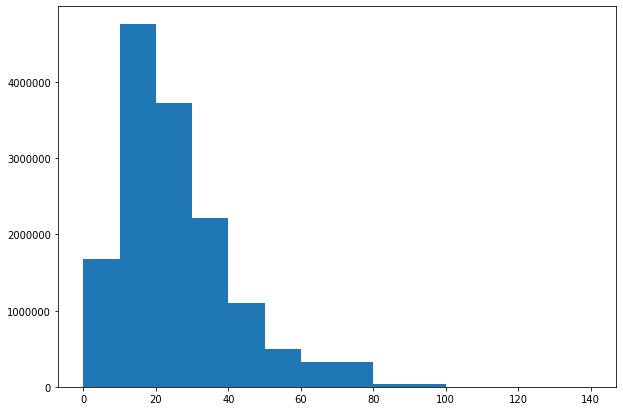

In [48]:
plt.rcParams['figure.figsize'] = [10, 7]
plt.hist(lengths, bins=[0,10,20,30,40,50,60,80,100,120,140])  # arguments are passed to np.histogram

In [17]:
#tokenized_sentences=[sen for sen in tokenized_sentences if len(sen)<81]
#okenized_sentences_test=[sen for sen in tokenized_sentences_test if len(sen)<81]

#### Train corpus tokenized sentencepiece , cutted length <130

In [50]:
print ("Number of sentences ", len(tokenized_sentences))
print("Number of all tokens (with _#start_ _#end_ in each sentence) ", sum([len(sen) for sen in tokenized_sentences]) )
print("Number of all tokens (without _#start_ _#end_ in each sentence) ",  sum([len(sen)-2 for sen in tokenized_sentences])) 

Number of sentences  14335456
Number of all tokens (with _#start_ _#end_ in each sentence)  346834764
Number of all tokens (without _#start_ _#end_ in each sentence)  318163852


#### Test corpus tokenized sentencepiece , cutted length <130

In [49]:
print ("Number of sentences ", len(tokenized_sentences_test))
print("Number of all tokens (with _#start_ _#end_ in each sentence) ", sum([len(sen) for sen in tokenized_sentences_test]) )
print("Number of all tokens (without _#start_ _#end_ in each sentence) ",  sum([len(sen)-2 for sen in tokenized_sentences_test])) 

Number of sentences  39896
Number of all tokens (with _#start_ _#end_ in each sentence)  1092083
Number of all tokens (without _#start_ _#end_ in each sentence)  1012291


#### Example of the longest sentence

In [56]:
print([sp_bpe.decode_ids(sen) for sen in tokenized_sentences_test if len(sen)>120])

["Закон зобов'язує державу забезпечити доступність усіх видів медичної допомоги : первинну медико-санітарну , амбулаторно-поліклінічну та стаціонарну допомогу ( лікарні широкого профілю , спеціалізовані медико-санітарні частини , пологові будинки , поліклініки й амбулаторії , загальні стоматологічні поліклініки , а також дільничні лікарні , медичні амбулаторії , фельдшерсько-акушерські , фельдшерські пункти , центри первинної медико-санітарної допомоги тощо .", 'Результати досліджень та їх аналіз До основних форм хмар відносяться хмари нижнього ярусу : шарувато-дощові _#foreign_ , розірвано шарувато-дощові _#foreign_ , шаруваті _#foreign_ , шарувато-купчасті _#foreign_ , купчасті _#foreign_ та купчасто-дощові _#foreign_ ; середнього ярусу : висококупчасті _#foreign_ та високошаруваті _#foreign_ ; верхнього ярусу : перисті _#foreign_ , перисто-купчасті _#foreign_ та перисто-шаруваті _#foreign_ .']


In [57]:
len(max([sen for sen in tokenized_sentences if len(sen)<200 ], key=len))

130

#### Count the word frequencies train

In [58]:
word_frequency = nltk.FreqDist(itertools.chain(*tokenized_sentences)) 

In [59]:
# Get the most common words and build index to word and word to index vectors
vocab = word_frequency.most_common(len(word_frequency.items()))
print("Found %d unique word tokens." % len(word_frequency.items()))

Found 19993 unique word tokens.


#### Count the word frequencies test

In [60]:
word_frequency_test = nltk.FreqDist(itertools.chain(*tokenized_sentences_test)) 

In [61]:
# Get the most common words and build index to word and word to index vectors
vocab_test = word_frequency_test.most_common(len(word_frequency_test.items()))
print("Found %d unique word tokens." % len(word_frequency_test.items()))

Found 18850 unique word tokens.


#### Number of tokens in vocabulary that occured more then N times

In [62]:
print("5 times - ", len([i for i in vocab if i[1] > 5]))
print("11 times - ", len([i for i in vocab if i[1] > 11]))
print("14 times - ", len([i for i in vocab if i[1] > 14]))

5 times -  19986
11 times -  19977
14 times -  19975


#### OOV for the whole train vocabulary (sentences<130)

In [63]:
len(set([tuple_word[0] for tuple_word in vocab_test])-set([tup[0] for tup in vocab]))

0

In [64]:
set([tuple_word[0] for tuple_word in vocab_test])-set([tup[0] for tup in vocab])

set()

#### Saving data

In [65]:
random.shuffle(tokenized_sentences)
len(tokenized_sentences)

14335456

In [66]:
tokenized_sentences[0]

[1,
 1089,
 433,
 11,
 179,
 1548,
 1699,
 11,
 4023,
 1781,
 3134,
 19970,
 2707,
 19975,
 800,
 19970,
 2219,
 1783,
 7849,
 730,
 56,
 374,
 3909,
 5611,
 12,
 6509,
 656,
 5230,
 52,
 2879,
 6283,
 13,
 2]

In [67]:
len(max(tokenized_sentences,key=len))

130

In [68]:
len(tokenized_sentences),

(14335456,)

In [69]:
len(max(tokenized_sentences,key=len))

130

In [71]:
# Save data to file
random.shuffle(tokenized_sentences)
data = dict(
    x_train=tokenized_sentences,
    num_sentences=len(tokenized_sentences),
    max_input_len=len(max(tokenized_sentences,key=len)))

In [72]:
print("Saving training data")
try:
    save_training_data(data_path_bpe, data)
except FileNotFoundError as err:
    print("Error saving data " + str(err))

Saving training data
Saved file training data to data/korr_ukrlib_data_bpe_20000.pkl.


In [73]:
random.shuffle(tokenized_sentences_test)
test_data = dict(
    x_test=tokenized_sentences_test)

In [74]:
print("Saving test data")
try:
    save_training_data(test_path_bpe, test_data)
except FileNotFoundError as err:
    print("Error saving data " + str(err))

Saving test data
Saved file training data to data/brown_test_data_bpe_20000.pkl.
